In [ ]:
import os
import pandas as pd
import soundfile as sf
import numpy as np
import pandas as pd
import keras
import matplotlib as plt
import os
import sys


from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import load_model
from keras.layers import Dense, Input, Dropout, Activation ,Activation
from keras.models import Model
from tensorflow.keras.layers.experimental.preprocessing import Normalization

# from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import Sequential
from keras import regularizers
# from keras.utils import np_utils
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from keras.utils import plot_model
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
class RAWSource(object):
    def __init__(self, **kwargs):
        super(RAWSource, self).__init__(**kwargs)
    def raw_to_time_series(self, raw_file_path, channels=1, samplerate=8000,
                           subtype='PCM_32', endian='LITTLE'):
        signal_raw = sf.read(raw_file_path, channels=channels,
                             samplerate=samplerate, subtype=subtype,
                             endian=endian)
        signal = signal_raw[0]
        return signal

In [ ]:
def read_raw_to_signals(directory):
    raw_reader = RAWSource()
    with os.scandir(directory) as entries:
        ID = []
        S = []
        for entry in entries:
            s = raw_reader.raw_to_time_series(entry)
            id = entry.name.split('.')[0]
            ID.append(id)
            S.append(s)

        d = {ID[0]: pd.Series(S[0]),ID[1]: pd.Series(S[1]),ID[2]: pd.Series(S[2]),
          ID[3]: pd.Series(S[3]),ID[4]: pd.Series(S[4]),ID[5]: pd.Series(S[5]),
          ID[6]: pd.Series(S[6]),ID[7]: pd.Series(S[7]),ID[8]: pd.Series(S[8]),
          ID[9]: pd.Series(S[9]),ID[10]: pd.Series(S[10]),ID[11]: pd.Series(S[11])}

    df_data = pd.DataFrame(d)
    df_data = df_data.head(240000)
    return df_data

In [ ]:
!unzip "/content/drive/MyDrive/Dynamic Pressure Sensor.zip"
!unzip "/content/drive/MyDrive/Hydrophone.zip"
!unzip "/content/drive/MyDrive/Accelerometer.zip"

Archive:  /content/drive/MyDrive/Dynamic Pressure Sensor.zip
   creating: Dynamic Pressure Sensor/
   creating: Dynamic Pressure Sensor/Branched/
   creating: Dynamic Pressure Sensor/Branched/Circumferential Crack/
  inflating: Dynamic Pressure Sensor/Branched/Circumferential Crack/BR_CC_0.18 LPS_P1.csv  
  inflating: Dynamic Pressure Sensor/Branched/Circumferential Crack/BR_CC_0.18 LPS_P2.csv  
  inflating: Dynamic Pressure Sensor/Branched/Circumferential Crack/BR_CC_0.47 LPS_P1.csv  
  inflating: Dynamic Pressure Sensor/Branched/Circumferential Crack/BR_CC_0.47 LPS_P2.csv  
  inflating: Dynamic Pressure Sensor/Branched/Circumferential Crack/BR_CC_ND_P1.csv  
  inflating: Dynamic Pressure Sensor/Branched/Circumferential Crack/BR_CC_ND_P2.csv  
  inflating: Dynamic Pressure Sensor/Branched/Circumferential Crack/BR_CC_Transient_P1.csv  
  inflating: Dynamic Pressure Sensor/Branched/Circumferential Crack/BR_CC_Transient_P2.csv  
   creating: Dynamic Pressure Sensor/Branched/Gasket Leak/


In [ ]:
df_1 = read_raw_to_signals("/content/Hydrophone/Branched/Orifice Leak")

In [ ]:
df_1

BR_OL_Transient_N_H1   BR_OL_0  BR_OL_Transient_NN_H1  BR_OL_ND_N_H1  \
0                   0.043884  0.049255               0.108551      -0.002350   
1                   0.049255  0.051056               0.109406       0.000153   
2                   0.053925  0.052826               0.110016       0.002869   
3                   0.058502  0.054932               0.110443       0.005676   
4                   0.063049  0.057251               0.110687       0.008423   
...                      ...       ...                    ...            ...   
239995              0.427704 -0.096588               0.382812       0.434570   
239996              0.430084 -0.102295               0.381378       0.437012   
239997              0.432526 -0.108063               0.380127       0.439667   
239998              0.434998 -0.113525               0.378601       0.442444   
239999              0.437622 -0.118835               0.376770       0.445374   

        BR_OL_Transient_N_H2  BR_OL_ND_NN_H1  BR_OL_Transient_NN_H2  \
0                  -0.106567       -0.073090              -0.023773   
1                  -0.103943       -0.073578              -0.023682   
2                  -0.101593       -0.073853              -0.023224   
3                  -0.100555       -0.073822              -0.022675   
4                  -0.099548       -0.073639              -0.022278   
...                      ...             ...                    ...   
239995              0.192139        0.392151               0.170013   
239996              0.193817        0.392792               0.170837   
239997              0.194580        0.393433               0.171814   
239998              0.195862        0.394012               0.172974   
239999              0.198700        0.394684               0.174286   

        BR_OL_ND_N_H2  BR_OL_ND_NN_H2  
0            0.037201       -0.013672  
1            0.037811       -0.012848  
2            0.038483       -0.011993  
3            0.038971       -0.011017  
4            0.039307       -0.010162  
...               ...             ...  
239995       0.200958        0.163422  
239996       0.200928        0.163818  
239997       0.200592        0.164368  
239998       0.199982        0.164948  
239999       0.199249        0.165527  

[240000 rows x 9 columns]

In [ ]:
df = pd.read_csv("/content/Dynamic Pressure Sensor/Branched/Circumferential Crack/BR_CC_0.18 LPS_P1.csv")
df

Sample        Value
0        0.000000 -5831.317138
1        0.000039 -5639.000792
2        0.000078 -5441.535304
3        0.000117 -5234.670590
4        0.000156 -5015.464283
...           ...          ...
943711  36.863711  -283.485033
943712  36.863750  -274.004074
943713  36.863789  -249.402620
943714  36.863828  -220.714547
943715  36.863867  -170.776048

[943716 rows x 2 columns]

In [ ]:
import os
import pandas as pd

# Define the folder paths
folder_paths = ["/content/Dynamic Pressure Sensor/Looped/No-leak", "/content/Dynamic Pressure Sensor/Looped/Orifice Leak"]

# Initialize an empty DataFrame to store the final dataset
df_noleak = pd.DataFrame()
df_leak = pd.DataFrame()
csv_files = [file for file in os.listdir(folder_paths[0]) if file.endswith(".csv")]
for csv_file in csv_files:
        # Read the CSV file into a DataFrame
        file_path = os.path.join(folder_paths[0], csv_file)
        df = pd.read_csv(file_path)
        df = df['Value']
        x = csv_file.replace(".csv", "")
        x = x[6:]
        df_noleak[x]= df


csv_files = [file for file in os.listdir(folder_paths[1]) if file.endswith(".csv")]
for csv_file in csv_files:
        # Read the CSV file into a DataFrame
        file_path = os.path.join(folder_paths[1], csv_file)
        df = pd.read_csv(file_path)
        df = df['Value']
        x = csv_file.replace(".csv", "")
        x=x[6:]
        df_leak[x]= df



df_leak['result']=1
df_noleak['result']=0





In [ ]:
df_leak = df_leak.dropna()
df_noleak = df_noleak.dropna()

In [ ]:
df_leak

ND_P2  0.18 LPS_P2  Transient_P1  0.18 LPS_P1  0.47 LPS_P2  \
0       -54.948120  -142.527952   5440.889065 -1825.203366  -227.600883   
1       -57.697625  -140.910596   5114.449844 -1841.876776  -228.894768   
2       -47.508282  -132.419477   4779.346989 -1844.410480  -233.019026   
3       -44.920512  -137.675884   4397.656663 -1844.328748  -230.269520   
4       -36.025054  -146.813946   4013.759562 -1836.073775  -232.291216   
...            ...          ...           ...          ...          ...   
914155  167.034004  -237.790226  -2749.515120 -2283.313489     4.570584   
914156  167.761814  -247.009156  -2747.962205 -2147.637699     3.438435   
914157  157.168132  -238.356301  -2718.865469 -2003.134809    11.606083   
914158  156.197718  -240.782335  -2645.633235 -1826.347619    11.525216   
914159  148.919616  -244.825725  -2530.717475 -1653.973980     9.746124   

              ND_P1  Transient_P2  0.47 LPS_P1  result  
0       -148.708299   -156.275479  5959.562900       1  
1        122.479817   -157.892835  6113.138087       1  
2        355.498900   -164.443127  6230.751016       1  
3        583.859237   -172.610776  6337.902197       1  
4        794.401909   -165.737012  6425.519334       1  
...             ...           ...          ...     ...  
914155 -3116.984008    -86.001357  3159.901140       1  
914156 -3232.635359   -101.851447  3026.023462       1  
914157 -3326.709356    -94.735080  2885.116798       1  
914158 -3398.715604    -99.910619  2735.056105       1  
914159 -3430.672974    -95.058551  2583.687693       1  

[914160 rows x 9 columns]

In [ ]:
df_noleak

0.47 LPS_P2       ND_P1  0.18 LPS_P2  Transient_P1  Transient_P2  \
0          5.945337  -41.311920   472.471702   -430.276430    194.367322   
1          3.923642  -44.499484   468.347444  -1902.113558    199.704597   
2         26.890098  -36.407976   467.134427  -2870.397345    198.815051   
3         19.207657  -24.965439   474.574265  -3805.252580    196.550753   
4         13.223439  -20.143228   463.333640  -5021.512481    194.852529   
...             ...         ...          ...           ...           ...   
900904   150.213501  235.679196  -239.164979    -98.034208      2.306286   
900905   141.964985  243.443775  -239.973657    -90.923489     -3.435328   
900906   143.258869  229.957928  -251.214282    -97.380349     -7.640454   
900907   147.059656  236.333056  -250.405604   -102.202561     -4.082271   
900908   135.657296  240.011014  -250.163000    -68.038416     -6.589173   

        0.47 LPS_P1  0.18 LPS_P1      ND_P2  result  
0       5637.373764  -700.402024 -18.072401       0  
1       4578.775670  -822.346771 -14.595085       0  
2       3854.953502  -767.586060 -27.048727       0  
3       4319.520485  -820.221728 -16.778516       0  
4       4248.985421  -681.194909 -27.210463       0  
...             ...          ...        ...     ...  
900904  1994.560526   580.263011   2.387154       0  
900905  2449.891748   780.670865   0.527194       0  
900906  2560.475690   765.632103 -11.117770       0  
900907  2898.193983   847.364506  -6.589173       0  
900908  3481.027754  1100.081099   1.740211       0  

[900909 rows x 9 columns]

In [ ]:
final_df = pd.DataFrame()

In [ ]:
final_df['Transient_P1'] = pd.concat([df_leak['Transient_P1'], df_noleak['Transient_P1']], axis=0, ignore_index=True)
final_df['0.47 LPS_P1'] = pd.concat([df_leak['0.47 LPS_P1'], df_noleak['0.47 LPS_P1']], axis=0, ignore_index=True)
final_df['0.18 LPS_P2'] = pd.concat([df_leak['0.18 LPS_P2'], df_noleak['0.18 LPS_P2']], axis=0, ignore_index=True)
final_df['ND_P1'] = pd.concat([df_leak['ND_P1'], df_noleak['ND_P1']], axis=0, ignore_index=True)
final_df['Transient_P2'] = pd.concat([df_leak['Transient_P2'], df_noleak['Transient_P2']], axis=0, ignore_index=True)
final_df['0.47 LPS_P2'] = pd.concat([df_leak['0.47 LPS_P2'], df_noleak['0.47 LPS_P2']], axis=0, ignore_index=True)
final_df['0.18 LPS_P1'] = pd.concat([df_leak['0.18 LPS_P1'], df_noleak['0.18 LPS_P1']], axis=0, ignore_index=True)
final_df['ND_P2'] = pd.concat([df_leak['ND_P2'], df_noleak['ND_P2']], axis=0, ignore_index=True)
final_df['result'] = pd.concat([df_leak['result'], df_noleak['result']], axis=0, ignore_index=True)



In [ ]:
final_df = final_df.sample(frac=1).reset_index(drop=True)

final_df

Transient_P1  0.47 LPS_P1  0.18 LPS_P2        ND_P1  Transient_P2  \
0         3914.699889 -2921.071436  -365.076151  -113.563365     96.112939   
1           19.578721 -1785.971812   346.237059    86.435827   -505.058321   
2         6012.198568  -665.747485   191.860420 -3279.222829    -76.378088   
3            7.564057 -3404.518604  -110.180830  -130.481973    -32.871209   
4         6232.794326    64.531543    56.164244    58.401613  -1308.318225   
...               ...          ...          ...          ...           ...   
1815064  -1665.579981 -5674.554388   225.582295 -2176.816167    -77.186766   
1815065  -2875.301290 -2762.674037    80.343717 -3031.083251    -83.009248   
1815066   -150.179482  2337.019298  -391.681659   178.221317    -43.626627   
1815067   -628.804439  3467.950570   129.026136 -7130.780626    177.465951   
1815068  -1128.352891 -4113.792405    64.574495   121.253831   -238.032830   

         0.47 LPS_P2  0.18 LPS_P1       ND_P2  result  
0         222.104979   412.875048   -3.677932       0  
1        -360.790157   509.809679   -1.494501       0  
2         -28.342612  3476.532472 -168.243914       1  
3           7.886164    98.041828   24.302329       0  
4          67.485736  -588.183434    7.724429       0  
...              ...          ...         ...     ...  
1815064  -326.987415  3116.909895   90.047854       1  
1815065  -156.437215  4875.627761  -95.382022       1  
1815066  -160.157134   565.060784   -9.904753       0  
1815067    25.111007  -590.063279  307.824852       1  
1815068   157.006396   230.938717    1.255004       0  

[1815069 rows x 9 columns]

In [ ]:
df34 = final_df.reset_index(drop=True)
df34 = df34.rename(columns={'Transient_P1': 'col1', '0.47 LPS_P1': 'col2',
       '0.18 LPS_P2': 'col3', 'ND_P1': 'col4', 'Transient_P2': 'col5',
       '0.47 LPS_P2': 'col6', '0.18 LPS_P1': 'col7', 'ND_P2': 'col8'})



In [ ]:
df34

col1         col2        col3         col4         col5  \
0        3914.699889 -2921.071436 -365.076151  -113.563365    96.112939   
1          19.578721 -1785.971812  346.237059    86.435827  -505.058321   
2        6012.198568  -665.747485  191.860420 -3279.222829   -76.378088   
3           7.564057 -3404.518604 -110.180830  -130.481973   -32.871209   
4        6232.794326    64.531543   56.164244    58.401613 -1308.318225   
...              ...          ...         ...          ...          ...   
1815064 -1665.579981 -5674.554388  225.582295 -2176.816167   -77.186766   
1815065 -2875.301290 -2762.674037   80.343717 -3031.083251   -83.009248   
1815066  -150.179482  2337.019298 -391.681659   178.221317   -43.626627   
1815067  -628.804439  3467.950570  129.026136 -7130.780626   177.465951   
1815068 -1128.352891 -4113.792405   64.574495   121.253831  -238.032830   

               col6         col7        col8  result  
0        222.104979   412.875048   -3.677932       0  
1       -360.790157   509.809679   -1.494501       0  
2        -28.342612  3476.532472 -168.243914       1  
3          7.886164    98.041828   24.302329       0  
4         67.485736  -588.183434    7.724429       0  
...             ...          ...         ...     ...  
1815064 -326.987415  3116.909895   90.047854       1  
1815065 -156.437215  4875.627761  -95.382022       1  
1815066 -160.157134   565.060784   -9.904753       0  
1815067   25.111007  -590.063279  307.824852       1  
1815068  157.006396   230.938717    1.255004       0  

[1815069 rows x 9 columns]

In [ ]:
final_df = df34

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
cor=final_df.corr()

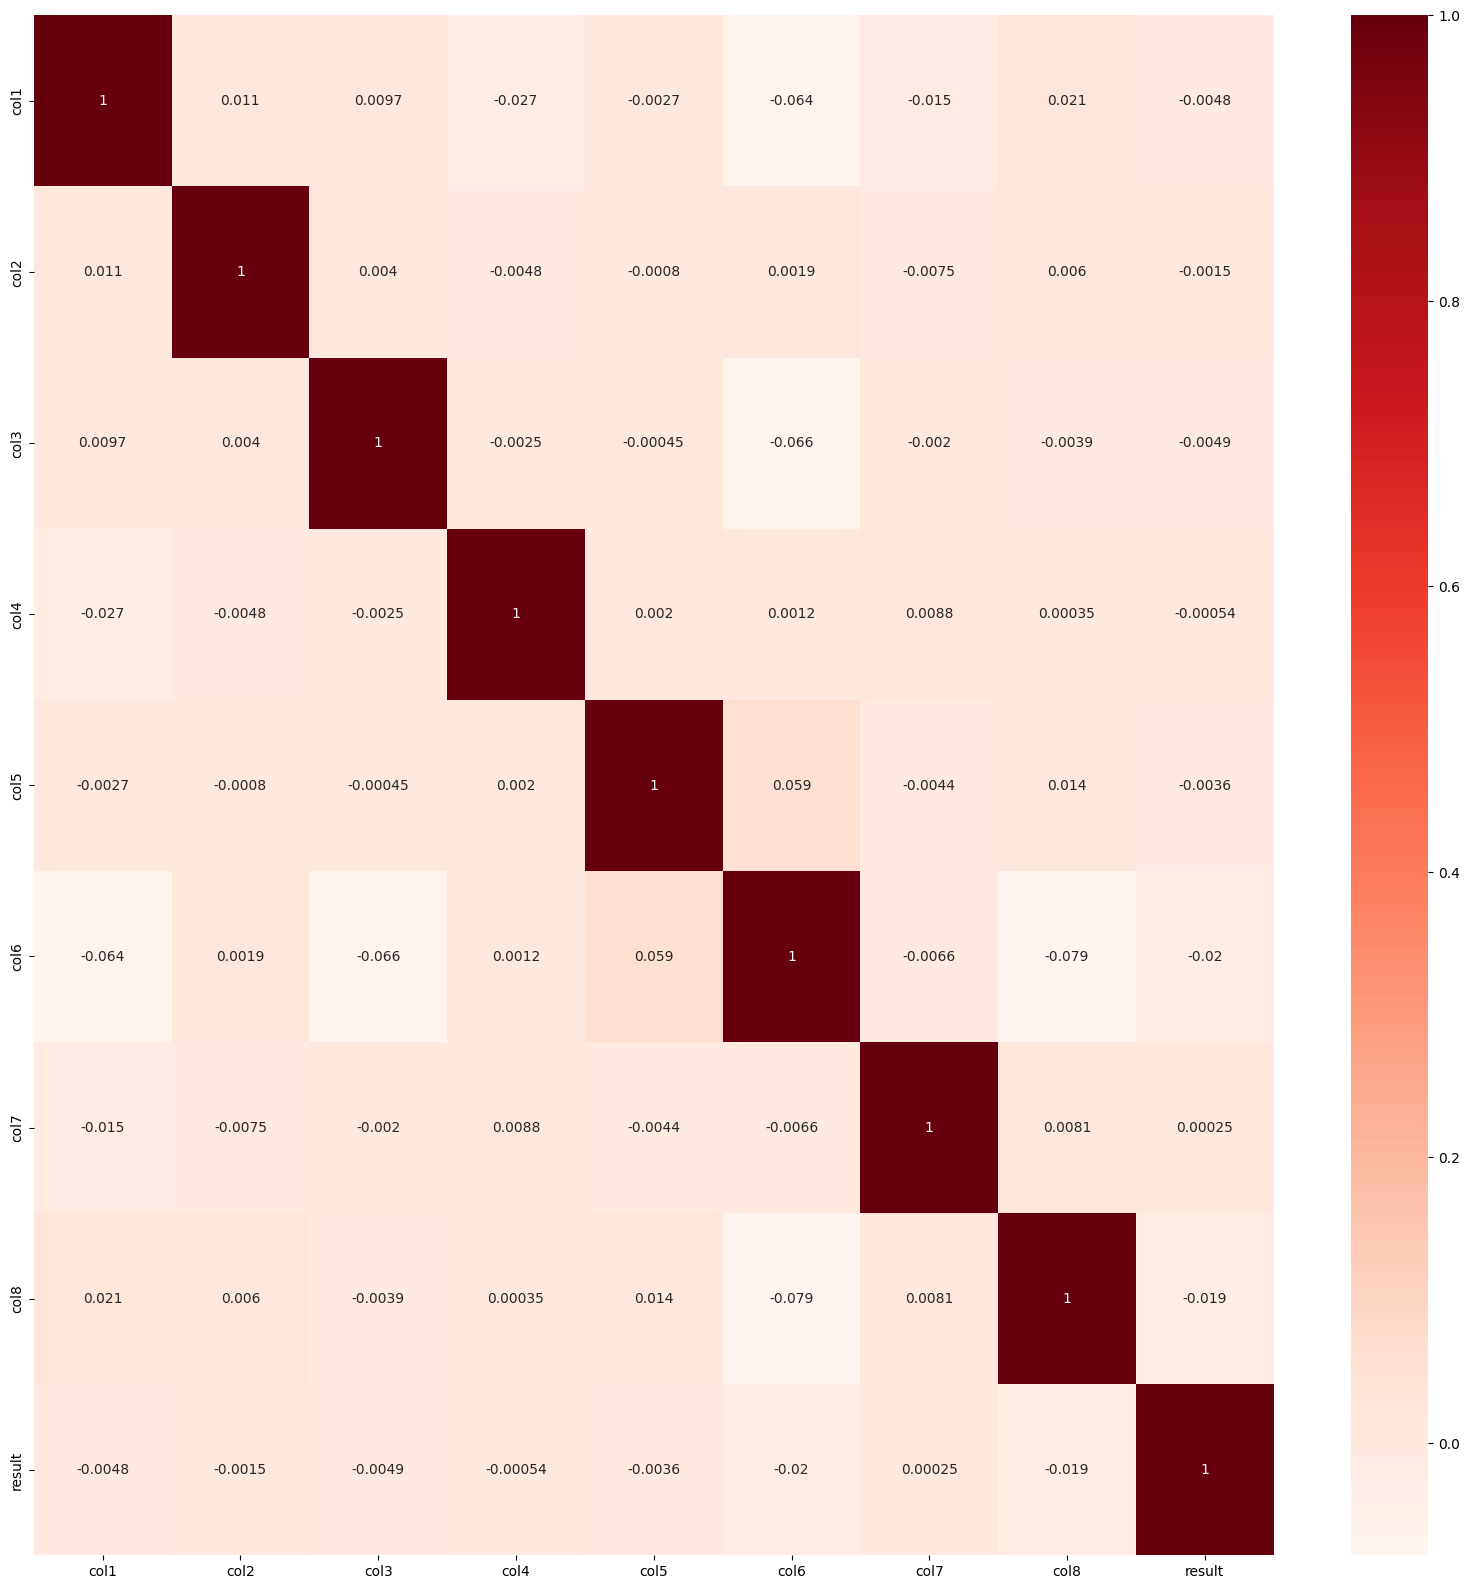

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


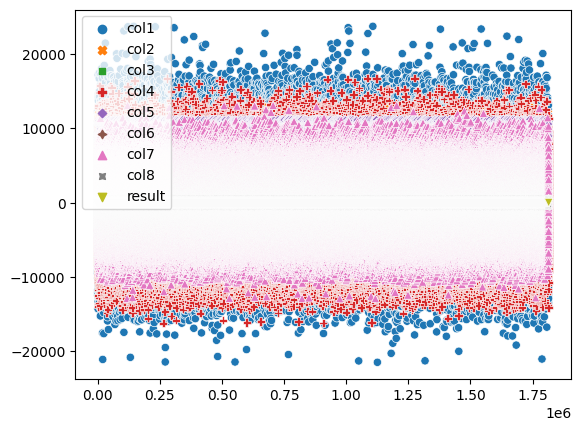

In [ ]:
sns.scatterplot(final_df)

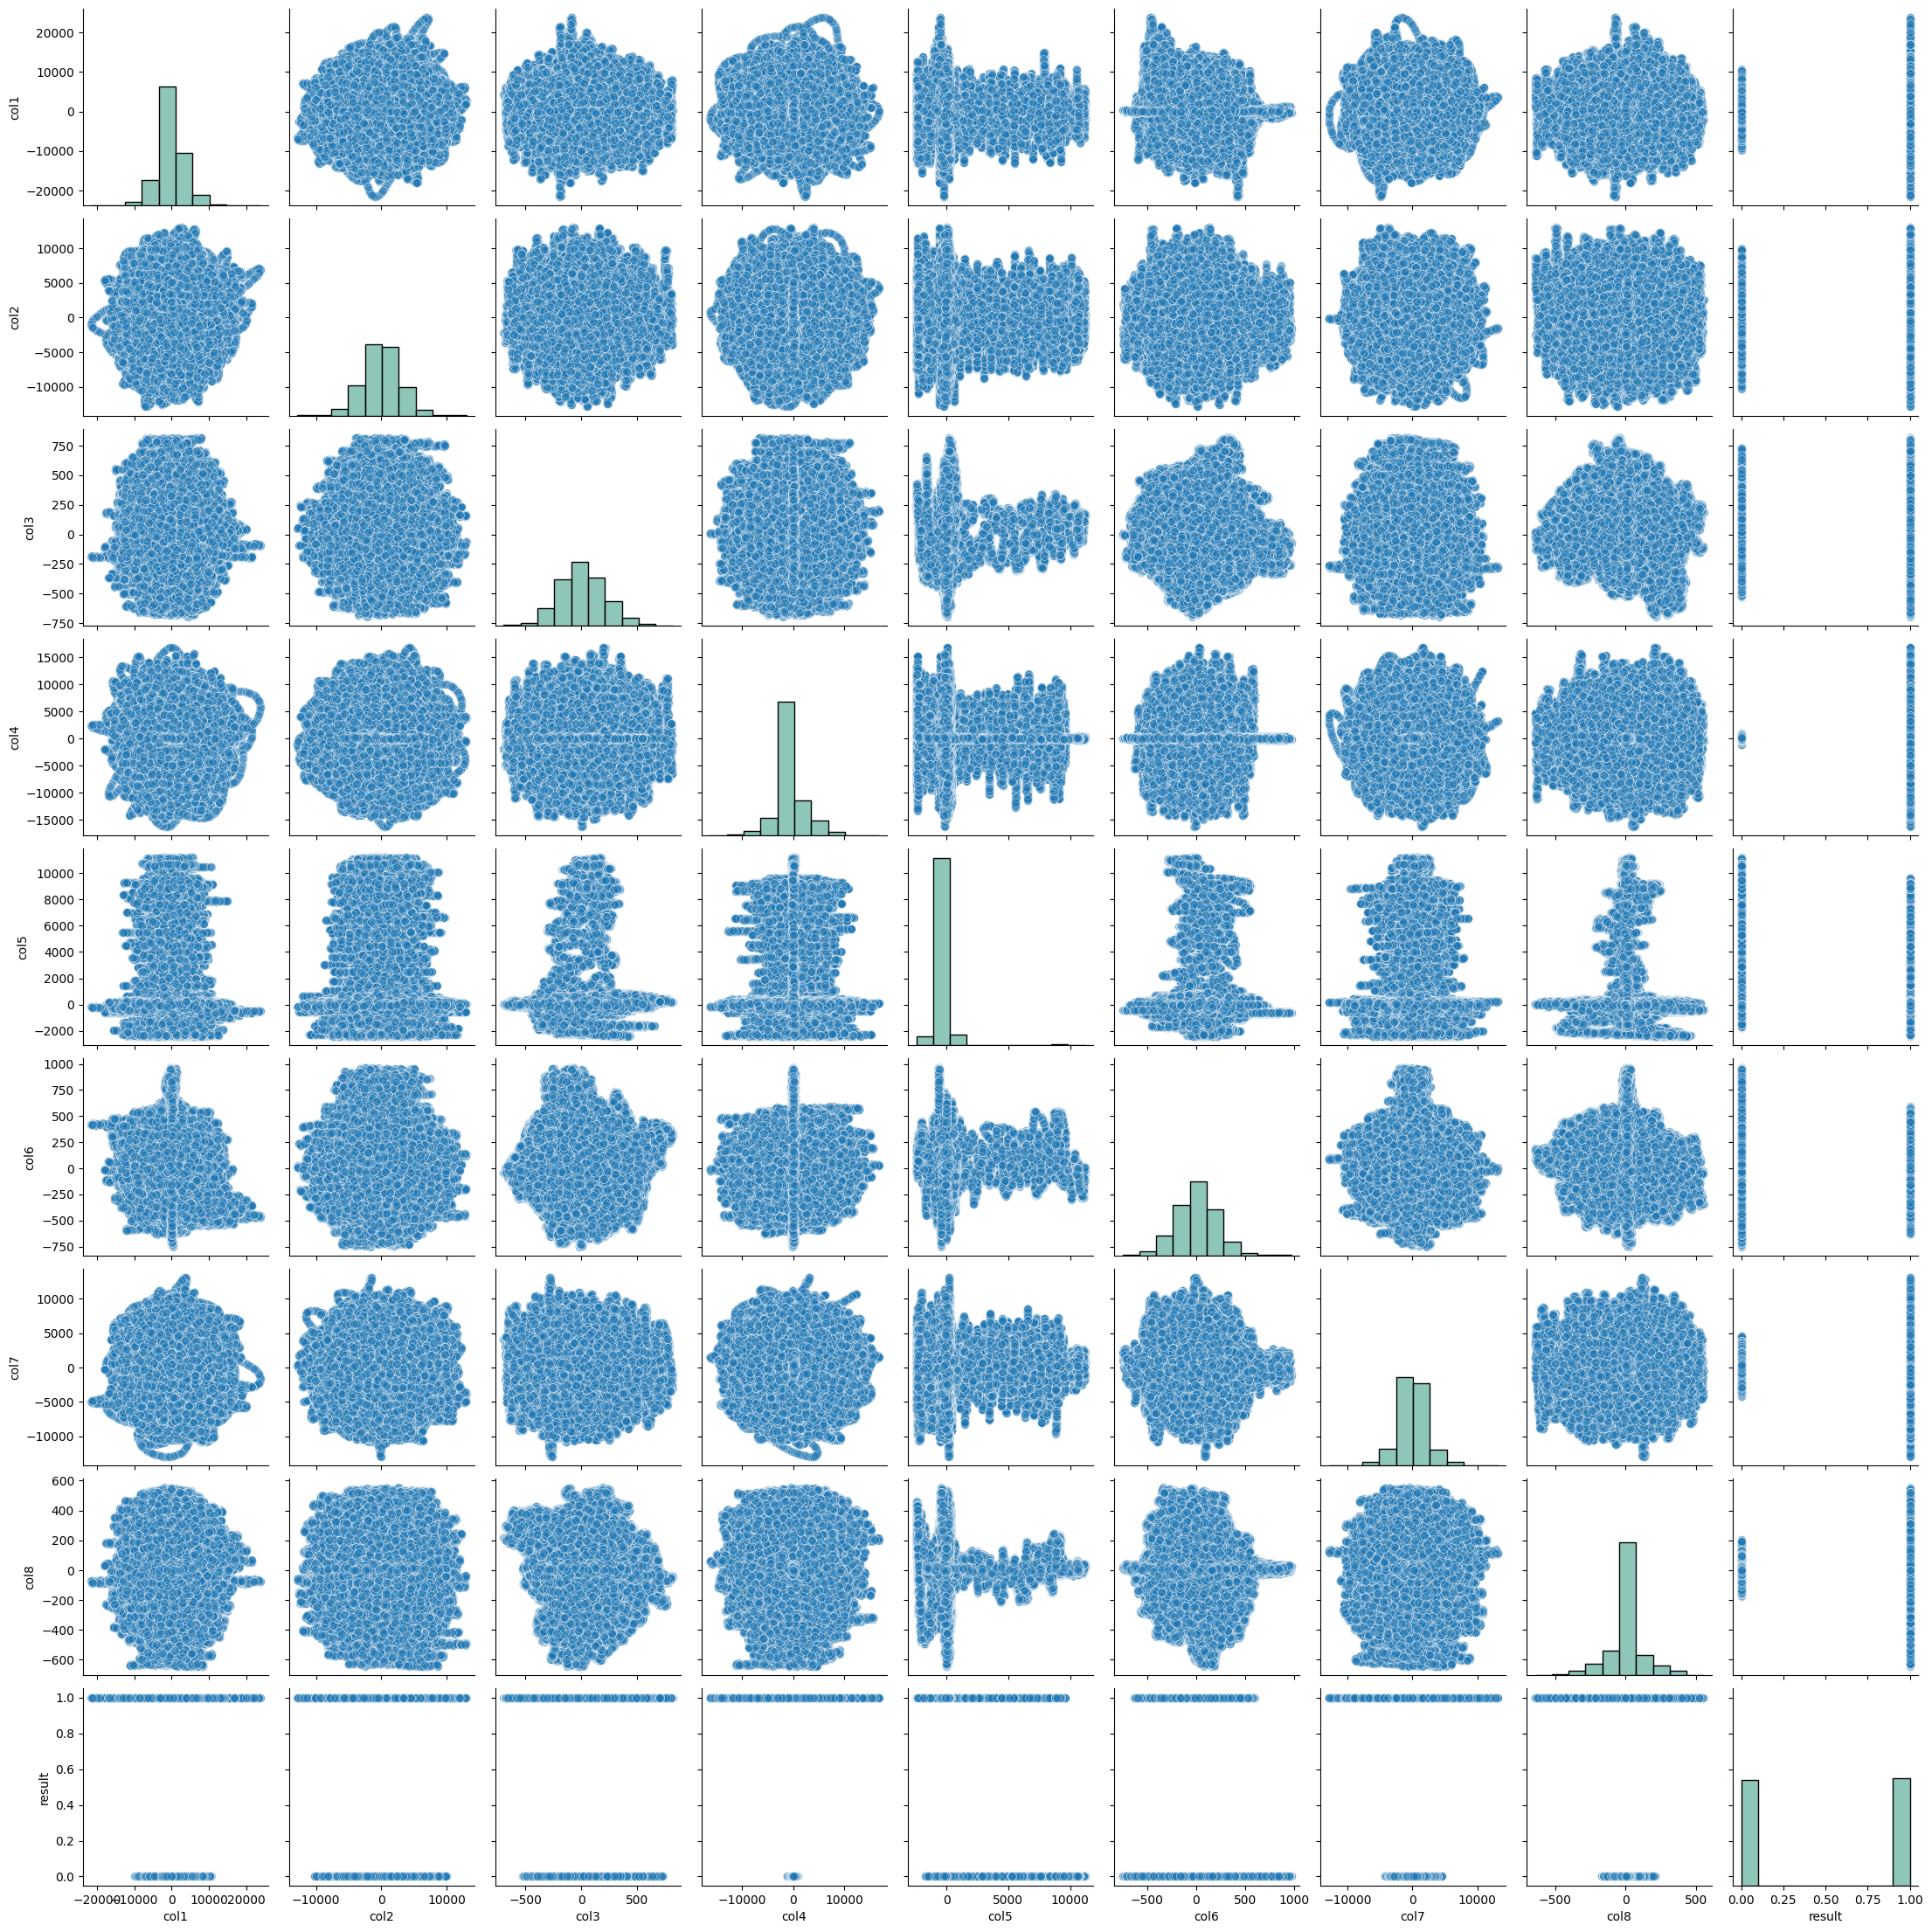

In [ ]:
sns.pairplot(data=final_df,kind="scatter", diag_kind='hist', markers="o", plot_kws=dict(s=50, edgecolors="b", alpha=0.5), diag_kws=dict(bins=10, color = "#69b3a2"))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataframe into features and target
x = final_df.drop('result', axis=1)
y = final_df['result']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
X_train_tensor = torch.Tensor(x_train.values)
y_train_tensor = torch.Tensor(y_train.values)
X_test_tensor = torch.Tensor(x_test.values)
y_test_tensor = torch.Tensor(y_test.values)


batch_size = 128

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# Convert your NumPy data to PyTorch tensors
X_train_tensor = torch.Tensor(x_train.values)
y_train_tensor = torch.Tensor(y_train.values)
X_test_tensor = torch.Tensor(x_test.values)
y_test_tensor = torch.Tensor(y_test.values)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class PyTorchModel(nn.Module):
    def __init__(self):
        super(PyTorchModel, self).__init__()
        self.fc1 = nn.Linear(8, 4)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(4, 4)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


In [ ]:
pytorch_model = PyTorchModel().to(device)

In [ ]:
# Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(pytorch_model.parameters(), lr = 0.01)

In [ ]:
# Training loop
num_epochs = 10
batch_size = 128

for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size].to(device)
        labels = y_train_tensor[i:i+batch_size].to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = pytorch_model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))  # Reshape labels for BCE loss

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Print the loss after each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item()}')

# Evaluate the model on the test data



Epoch [1/10] Loss: 0.12872041761875153
Epoch [2/10] Loss: 0.10644257813692093
Epoch [3/10] Loss: 0.1212245523929596
Epoch [4/10] Loss: 0.12523029744625092
Epoch [5/10] Loss: 0.08304984867572784
Epoch [6/10] Loss: 0.0914609283208847
Epoch [7/10] Loss: 0.04073529690504074
Epoch [8/10] Loss: 0.04427797347307205
Epoch [9/10] Loss: 0.04733921214938164
Epoch [10/10] Loss: 0.050047773867845535


Testing

In [ ]:
with torch.no_grad():
    y_pred = pytorch_model(X_test_tensor.to(device))
    y_pred = (y_pred >= 0.5).float()  # Convert to binary predictions (0 or 1)
    y_pred = y_pred.to('cpu')
    accuracy = torch.sum(y_pred == y_test_tensor.view(-1, 1)).item() / len(y_test_tensor)
    print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.9823257699970028


In [ ]:
from sklearn.metrics import confusion_matrix


# Assuming y_true and y_pred are your ground truth and predicted labels
cm = confusion_matrix(y_test_tensor, y_pred)


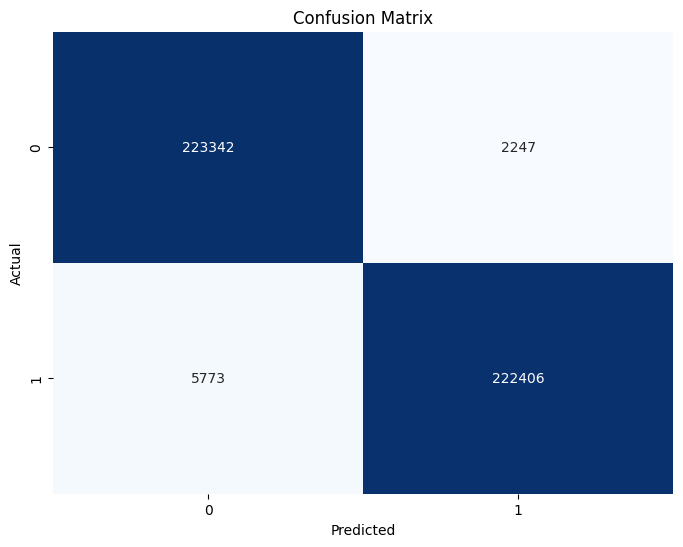

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
# Precision
precision = precision_score(y_test_tensor, y_pred)

# Recall
recall = recall_score(y_test_tensor, y_pred)

# F1 Score
f1 = f1_score(y_test_tensor, y_pred)

accuracy = accuracy_score(y_test_tensor, y_pred)


In [ ]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.9899979078846043
Recall: 0.9746996875260212
F1 Score: 0.9822892375097168
Accuracy: 0.9823257699970028


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_tensor,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    225589
         1.0       0.99      0.97      0.98    228179

    accuracy                           0.98    453768
   macro avg       0.98      0.98      0.98    453768
weighted avg       0.98      0.98      0.98    453768



In [ ]:
from xgboost import XGBClassifier

In [ ]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

In [ ]:
bst.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = bst.predict(x_test)

In [ ]:
acc = bst.score(x_test,y_test)

In [ ]:
acc

0.9626350910597486

In [ ]:
print(classification_report(y_test_tensor,preds))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96    225305
         1.0       0.97      0.95      0.96    228463

    accuracy                           0.96    453768
   macro avg       0.96      0.96      0.96    453768
weighted avg       0.96      0.96      0.96    453768



In [ ]:
cm = confusion_matrix(y_test_tensor, preds)

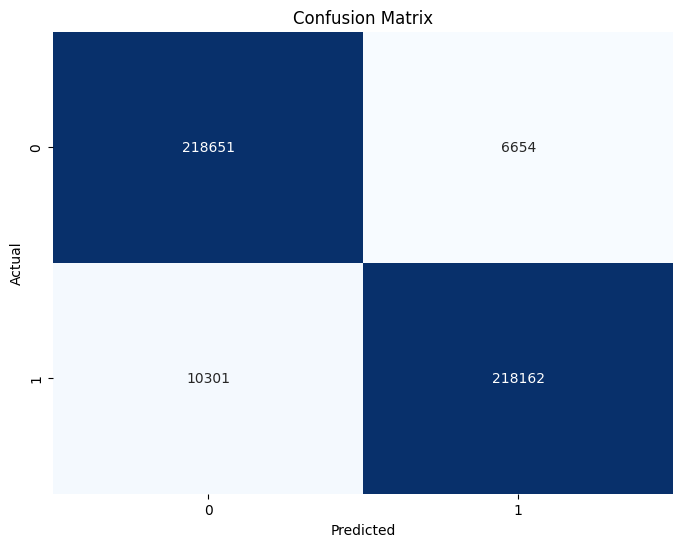

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


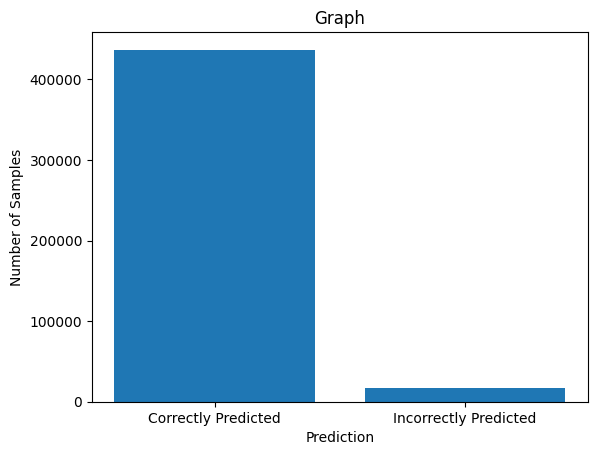

In [ ]:
import matplotlib.pyplot as plt

# Create data
correctly_predicted = 436813
incorrectly_predicted = 16955

# Create bar chart
plt.bar(["Correctly Predicted", "Incorrectly Predicted"], [correctly_predicted, incorrectly_predicted])

# Add labels
plt.xlabel("Prediction")
plt.ylabel("Number of Samples")
plt.title("Graph")

# Show plot
plt.show()
